
# Predicting Subsciption Status of Mincecraft Players Based on the Hours Played and Age


### Intro

The data being utilized in the following report was collected by a team of researchers at the University of British Columbia, led by Frank Wood. The aim of collecting the data was to predict how people play video games (through various factors). The particular video game being played is Minecraft (which is an open world simulation game, in which players maneuver through a world made of blocks – they may encounter enemies, build large structures, or just adventure).<br>
<br>
The gathered data consists of 2 files:<br>
(a) a file containing a list of all unique players, which includes data about each player, and <br>
(b) a file containing a list of individual playing sessions, which includes data about each session. <br>
However, for the purpose of our report, we will only be utilizing the data from the players file. <br>

> The players dataset consists of the following columns: <br>
> 1. Experience
> 2. Subscription
> 3. Email (Hashed Form)
> 4. Hours Played
> 5. Name of Player
> 6. Gender of Player
> 7. Age of Player

For the purpose of this report, we will only be focusing on 3 of the columns. These three columns are Age, Hours Played, and Subscription. The reason for this is that we will use 2 columns with quantitative data (Age and Hours Played) to predict a categorical value in the Subscription column.

> **The Question we will be trying to Answer:** <br>
*Can the Age and Hours Played of a Player predict the said player's Subscription status?*

### Wrangling & Cleaning The Data

The following code loads the necessary libraries for data-analysis.

In [1]:
library(tidyverse)
library(tidymodels)
library(digest)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Firstly, we will be loading the *players* dataset and storing it in a variable called *players*. This is done in the following code:

In [2]:
# we download the dataset
players <- read_csv("https://raw.githubusercontent.com/Greatbun123/DSCI-Project/refs/heads/main/players.csv")

# Since the dataset is quite large, the head function shows the first few rows of data
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Next, to investigate our particular question (stated in the **Introduction** section), we will clean the data so that it only consists of the columns we desire for analysis. 

In [3]:
# We only require the subscribe, played_hours, and Age columns
players_cleaned <- players |> 
                select(subscribe, played_hours, Age)

head(players_cleaned)

subscribe,played_hours,Age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


**An Important Note**
>After closely looking at the data, we realize that the *subscribe* column consists of either TRUE or FALSE values. This is categorical data, as it's separated into 2 categories: *TRUE or FALSE*. Therefore, we can convert this column to factor, to ensure that R treats it correctly in summaries, visualizations, modelling etc.

To do this, we need to first load the dplyr library, and then use the mutate function to change the subscribe column.

In [4]:
# Run this cell to load the dplyr library
library(dplyr)

We then mutate the column:

In [5]:
# Run the following cell to convert subscribe to factor through mutation
players_mutated <- players_cleaned |>
        mutate(subscribe = as.factor(subscribe))

head(players_mutated)

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


### Creating Initial Visualizations

Before we can perform any data analysis, we need to create some initial visualizations to see if we can spot any trends in the data. To do this, we can create an array of plots that can help us better understand that data.

> **(1)** Visualizing Boxplots for the Data:

**Boxplot for Age by Subscription Status**

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


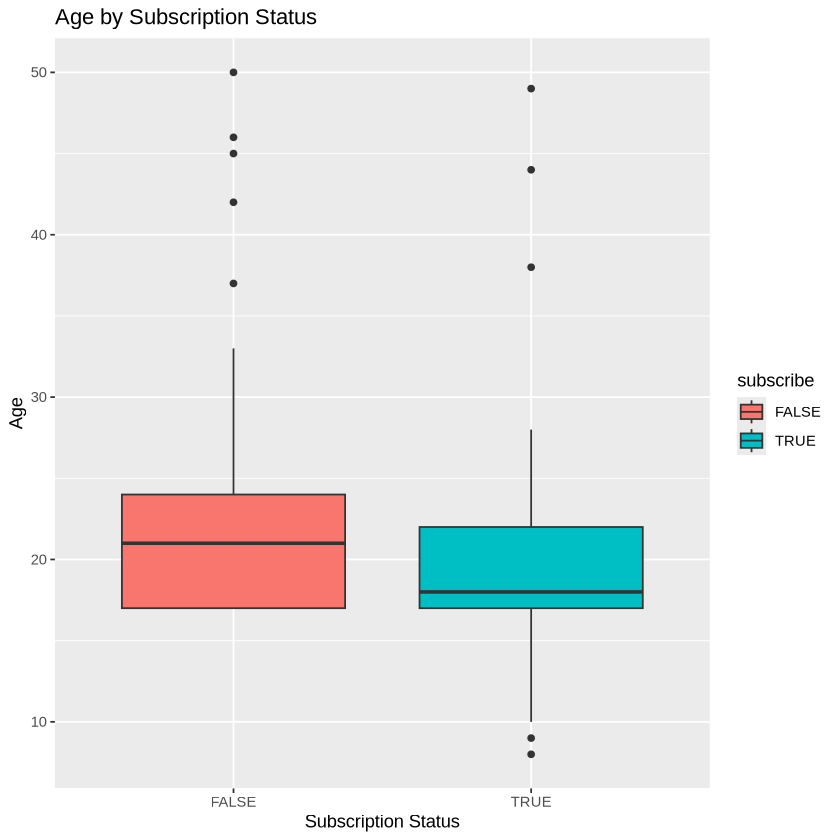

In [6]:
boxplot_age <- ggplot(players_mutated, aes(x = subscribe, y = Age, fill = subscribe)) + 
            geom_boxplot() + 
            labs(title = "Age by Subscription Status", x = "Subscription Status", y = "Age")

boxplot_age

This boxplot tells us that when we plot Age by Subscription status, the median age of non-subscribed players is higher. Furthermore, we can spot that both the categories have outliers. However, the subscribed category is the only category with young outliers in the age range of 5 to 10. This indicates that younger players might have a higher liklihood of being subscribed.

**Boxplot for Played Hours by Subscription Status**

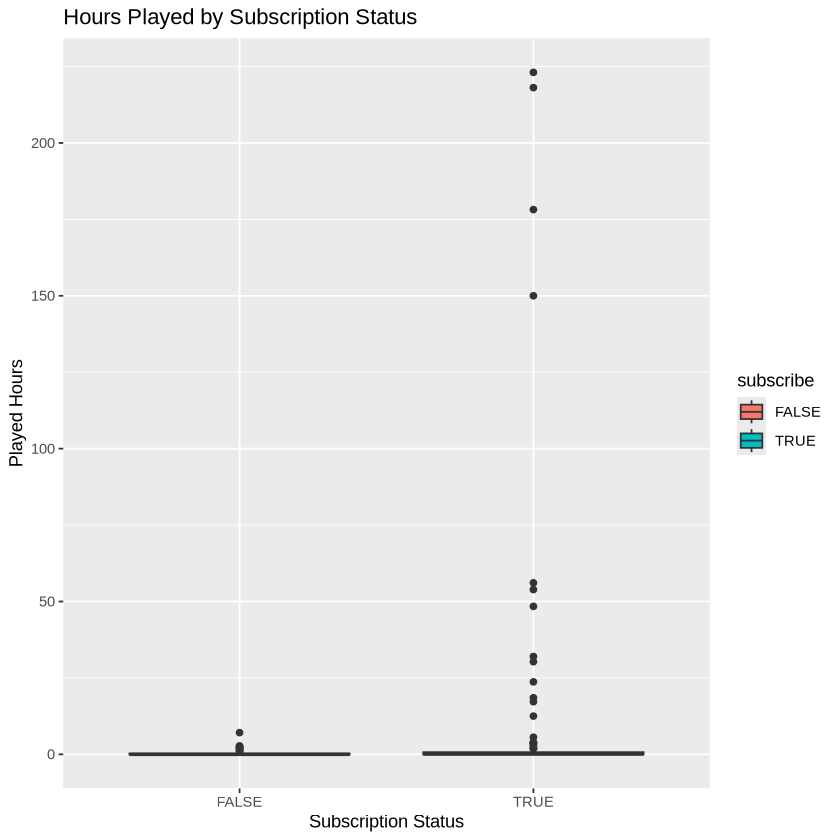

In [7]:
boxplot_hours_played <- ggplot(players_mutated, aes(x = subscribe, y = played_hours, fill = subscribe)) + 
                    geom_boxplot() + 
                    labs(title = "Hours Played by Subscription Status", x = "Subscription Status", y = "Played Hours")

boxplot_hours_played

We can see that plotting a boxplot for Hours Played by Subscription status doesn't tell us much, except for the fact that most players dont play for a long time. Other than that, it tells us that Subscribed Players tend to play a greater number of hours. To better visualize this relationship, we can apply logarithmic scaling to the y-axis.

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


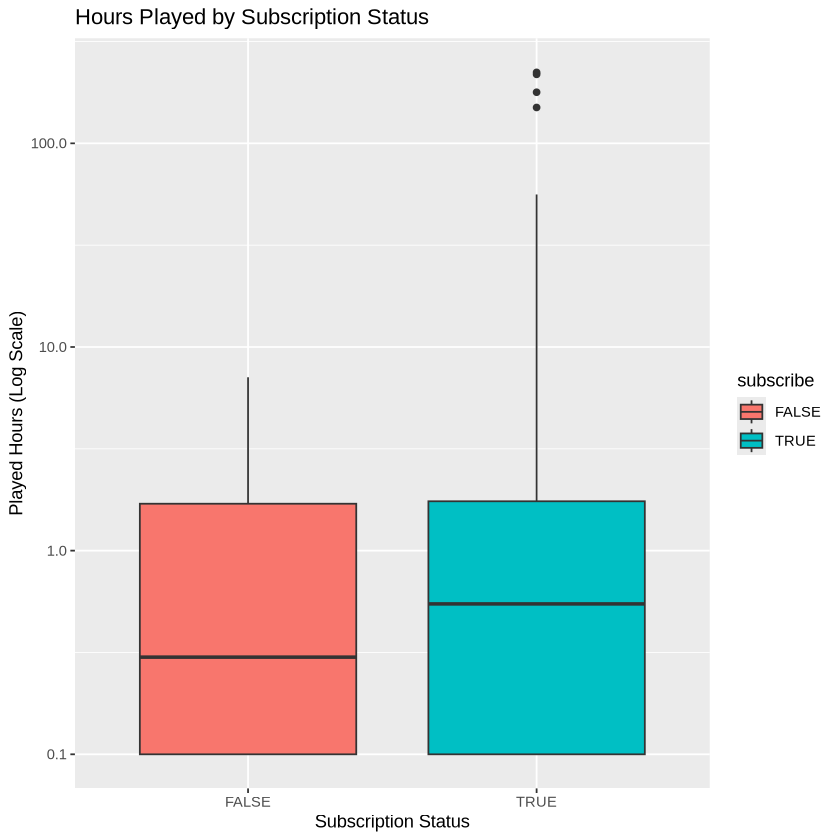

In [8]:
boxplot_hours_played_scaled <- ggplot(players_mutated, aes(x = subscribe, y = played_hours, fill = subscribe)) + 
                            geom_boxplot() + 
                            scale_y_log10() +
                            labs(title = "Hours Played by Subscription Status", x = "Subscription Status", y = "Played Hours (Log Scale)")

boxplot_hours_played_scaled

This makes the visualization easier to interpret, yet it still provides us with the same information: Outliers show us that subscribed players are more likely to be players that have played longer amounts of time. The median amount of time played is similar between subscribed players and non-subscribed players.

> **(2)** Visualizing Histograms for the Data

**Histogram for Age by Subscription Status**

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


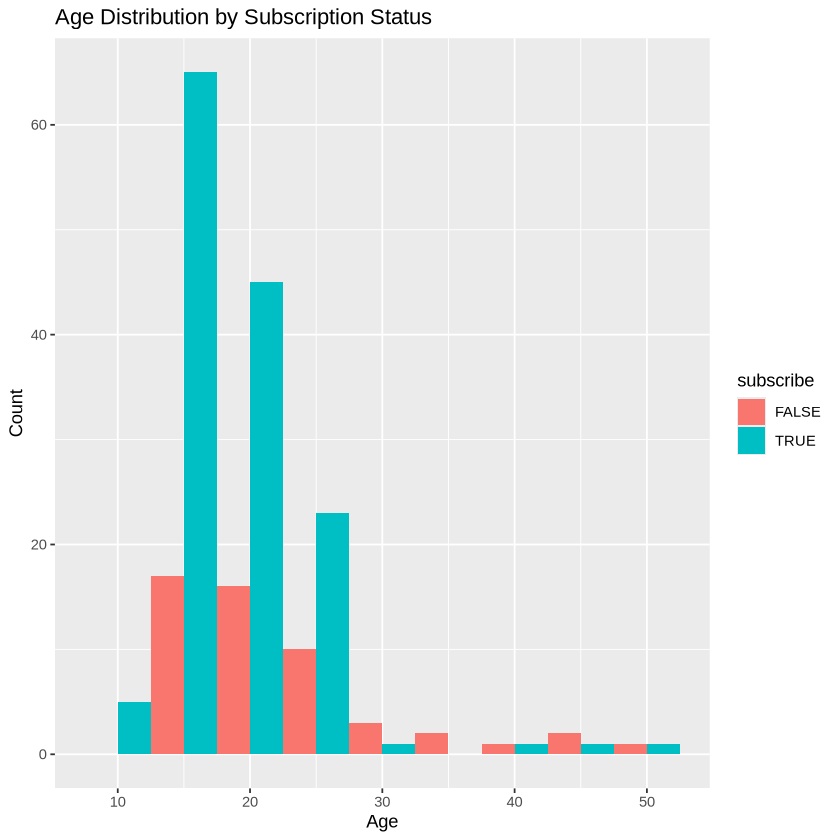

In [9]:
histogram_age <- ggplot(players_mutated, aes(x = Age, fill = subscribe)) +  
            geom_histogram(binwidth = 5, position = "dodge") +  
            labs(title = "Age Distribution by Subscription Status", x = "Age", y = "Count")  

histogram_age

The above histogram tells us that the number of individuals that are subscribed outnumber that number of individuals that are not subscribed in nearly every age group. However, the number of individuals that are subscribed tend to decrease in number after the age of 15. The ratio between subscribed and non-subscribed balances out in older age groups.

**Histogram for Hours Played by Subscription Status**

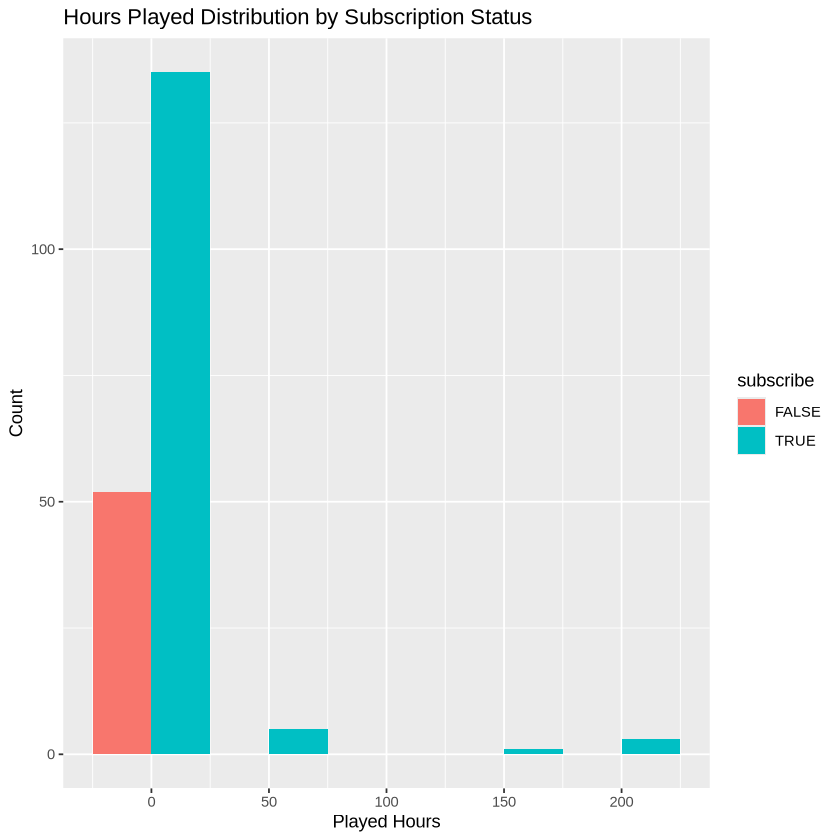

In [10]:
histogram_hours_played <- ggplot(players_mutated, aes(x = played_hours, fill = subscribe)) +  
                    geom_histogram(binwidth = 50, position = "dodge") +
                    labs(title = "Hours Played Distribution by Subscription Status", x = "Played Hours", y = "Count")

histogram_hours_played

The plot above indicates that a greater number of played hours relates to a positive subscription status. We can apply scaling to the x-axis to solidify this indication.

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


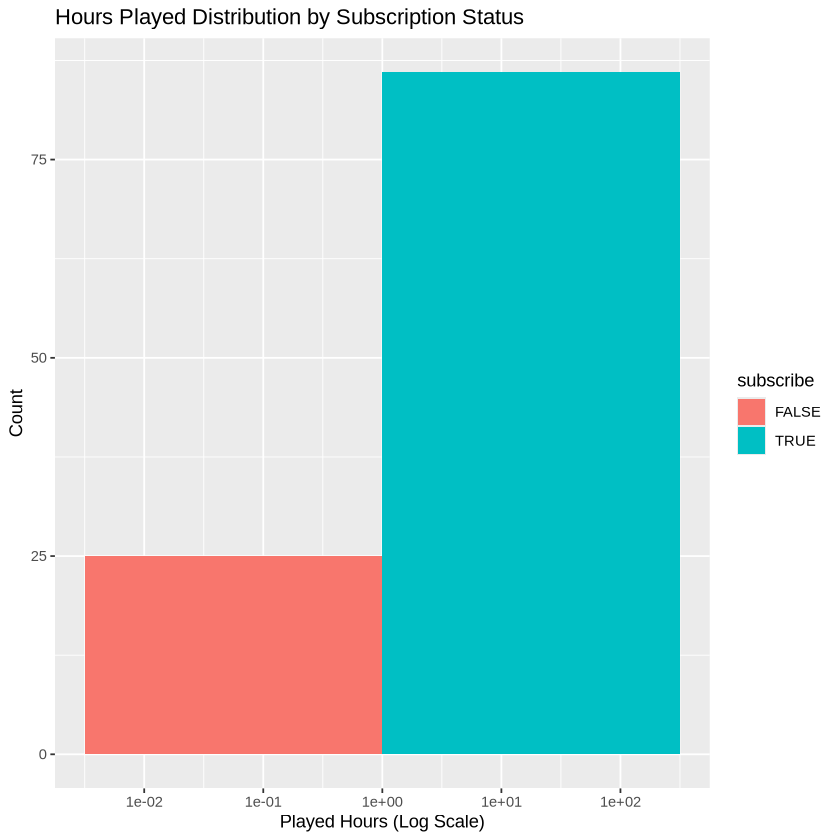

In [11]:
histogram_hours_played_scaled <- ggplot(players_mutated, aes(x = played_hours, fill = subscribe)) +  
                            geom_histogram(binwidth = 5, position = "dodge") +  
                            scale_x_log10() +
                            labs(title = "Hours Played Distribution by Subscription Status", x = "Played Hours (Log Scale)", y = "Count")  

histogram_hours_played_scaled

> **(3)** Visualizing Scatterplot for the Data:

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


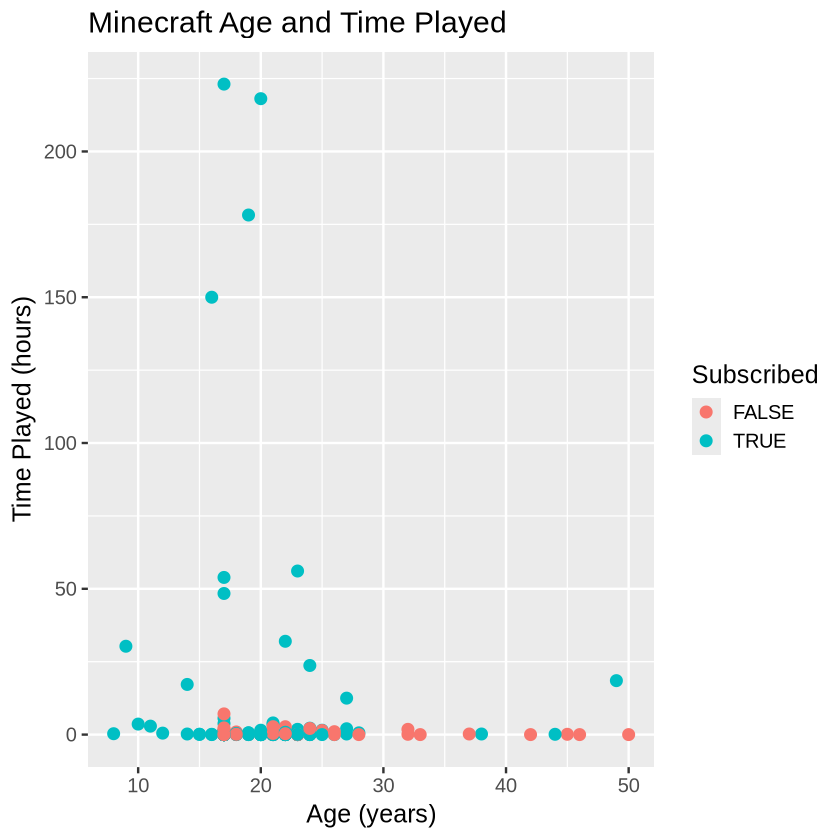

In [12]:
hours_plot <- players_mutated |> 
  ggplot(aes(x = Age, y = played_hours, colour = subscribe)) + 
  geom_point(size = 3) +
  ggtitle("Minecraft Age and Time Played") + 
  labs(x = "Age (years)", y = "Time Played (hours)", colour = "Subscribed") + 
  theme_gray(base_size = 15)

hours_plot

From the scatterplot above we can deduce an interesting relationship between the age and time played to the subscription status of the participants. Notably, all participants with significant hours played on the server are subscribed to the newletter. We can also notice that everyone below the age of ~17 appears to be subscribed, though this could be an effect of the low sample size.

This solidifies our initial prediction regarding the relationship between played hours and subscription; that a greater number of played hours indicates a positive subscription status. The next step is to create our training and trial data sets from the available data.

In [13]:
player_split <- initial_split(players_mutated, prop = 0.75, strata = subscribe)
player_train <- training(player_split)
player_test <- testing(player_split)

Now it is time to check the proportions of the data sets.

In [14]:
player_proportions <- players_mutated |>
                      group_by(subscribe) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(players_mutated))
player_proportions

subscribe,n,percent
<fct>,<int>,<dbl>
FALSE,52,26.53061
TRUE,144,73.46939


In [15]:
subscribe_proportions <- player_train |>
                      group_by(subscribe) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(player_train))
subscribe_proportions

subscribe,n,percent
<fct>,<int>,<dbl>
FALSE,39,26.53061
TRUE,108,73.46939


It can be seen the ratio of subscribed to non subscribed players is a similar proportion in the original data and training data. This is a good sign and is thus a usable training set. The next step is to scale the data so the variables have the same weight in the K-nearest neighbour equation.

In [16]:
subscribe_recipe <- recipe(subscribe ~ Age + played_hours, data = players_mutated) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

In [17]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(knn_spec) |>
  fit(data = player_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3655172
Best kernel: rectangular
Best k: 3

We now have a base recipe, but is this the most accurate model? To ensure we have the best model possible, we split the train data to tune our K value.

In [18]:
player_vfold <- vfold_cv(player_train, v = 5, strata = subscribe)

vfold_recipe <- recipe(subscribe ~ Age + played_hours,
                                   data = player_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_fit <- workflow() |>
  add_recipe(vfold_recipe) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = player_vfold)

knn_fit |>
  collect_metrics()

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 27 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 27.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.5954023,3,0.07711721,Preprocessor1_Model1
roc_auc,binary,0.5751263,3,0.06798278,Preprocessor1_Model1


Next we test to find the best K value.

In [19]:
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = player_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 27 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 27.

There were issues with some computations   A: x1   B: x1

There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4712644,3,0.048033510,Preprocessor1_Model01
6,accuracy,binary,0.6295019,3,0.087548522,Preprocessor1_Model02
11,accuracy,binary,0.6731801,3,0.044538479,Preprocessor1_Model03
16,accuracy,binary,0.6620690,3,0.037931034,Preprocessor1_Model04
21,accuracy,binary,0.7302682,3,0.003065134,Preprocessor1_Model05
26,accuracy,binary,0.7302682,3,0.003065134,Preprocessor1_Model06
31,accuracy,binary,0.7302682,3,0.003065134,Preprocessor1_Model07
36,accuracy,binary,0.7302682,3,0.003065134,Preprocessor1_Model08
41,accuracy,binary,0.7302682,3,0.003065134,Preprocessor1_Model09


Next we visualize the K values to find the best value.

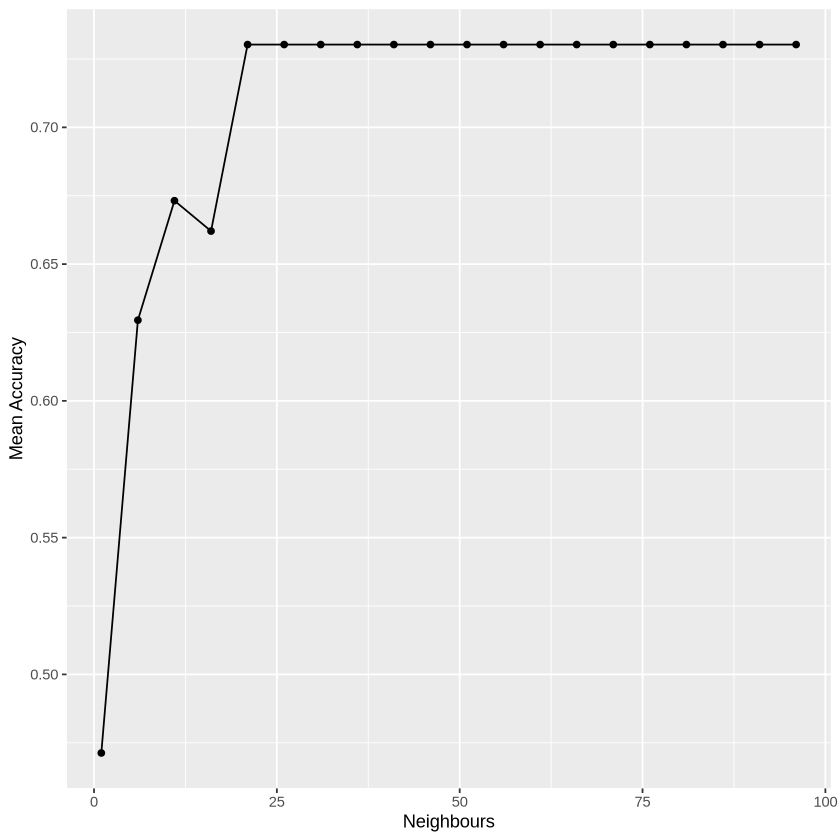

In [20]:
k_graph <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbours", y = "Mean Accuracy") 
k_graph

In [21]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 21

From this, the top accuracy will come from a K value of 16. We can then plug this value back into our original recipe.

In [22]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 16) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(knn_spec) |>
  fit(data = player_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(16,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2482759
Best kernel: rectangular
Best k: 16

In [23]:
subscribe_test_predictions <- predict(knn_fit, player_test) |>
  bind_cols(player_test)

subscribe_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5306122


In [24]:
confusion <- subscribe_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

          Truth
Prediction FALSE TRUE
     FALSE     6   16
     TRUE      7   20

While this is an ok model, it is worth trying vfold= 10 to see if that will increase the accuracy

In [25]:
player_vfold <- vfold_cv(player_train, v = 10, strata = subscribe)

vfold_recipe <- recipe(subscribe ~ Age + played_hours,
                                   data = player_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_fit <- workflow() |>
  add_recipe(vfold_recipe) |>
  add_model(knn_spec) |>
  fit_resamples(resamples = player_vfold)

knn_fit |>
  collect_metrics()

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 14 rows.
               ✖ Assigned data has 15 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 15 to size 14.



.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.7271062,8,0.03484862,Preprocessor1_Model1
roc_auc,binary,0.5298295,8,0.06067196,Preprocessor1_Model1


In [26]:
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = player_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 14 rows.
               ✖ Assigned data has 15 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 15 to size 14.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x2





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5016026,8,0.065740855,Preprocessor1_Model01
6,accuracy,binary,0.6085623,8,0.034730782,Preprocessor1_Model02
11,accuracy,binary,0.6348443,8,0.035267261,Preprocessor1_Model03
16,accuracy,binary,0.7271062,8,0.034848624,Preprocessor1_Model04
21,accuracy,binary,0.7271062,8,0.010164423,Preprocessor1_Model05
26,accuracy,binary,0.7354396,8,0.005371798,Preprocessor1_Model06
31,accuracy,binary,0.7354396,8,0.005371798,Preprocessor1_Model07
36,accuracy,binary,0.7354396,8,0.005371798,Preprocessor1_Model08
41,accuracy,binary,0.7354396,8,0.005371798,Preprocessor1_Model09


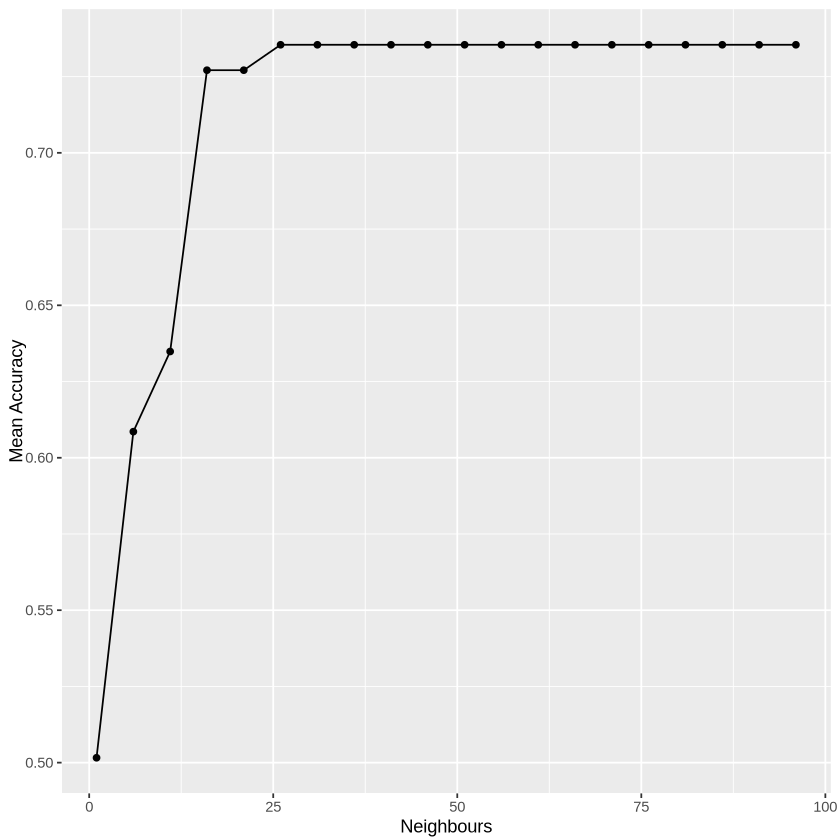

In [27]:
k_graph <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbours", y = "Mean Accuracy") 
k_graph

In [28]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 26

In [29]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 21) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(knn_spec) |>
  fit(data = player_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2689655
Best kernel: rectangular
Best k: 21

In [30]:
subscribe_test_predictions <- predict(knn_fit, player_test) |>
  bind_cols(player_test)

subscribe_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7755102


In [31]:
confusion <- subscribe_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

          Truth
Prediction FALSE TRUE
     FALSE     2    0
     TRUE     11   36

Based on the increased accuracy, the K value with the best results is K = 26. This gives a model with a 73.47% accuracy. A graph can help us see if there are areas with better or worse accuracy.

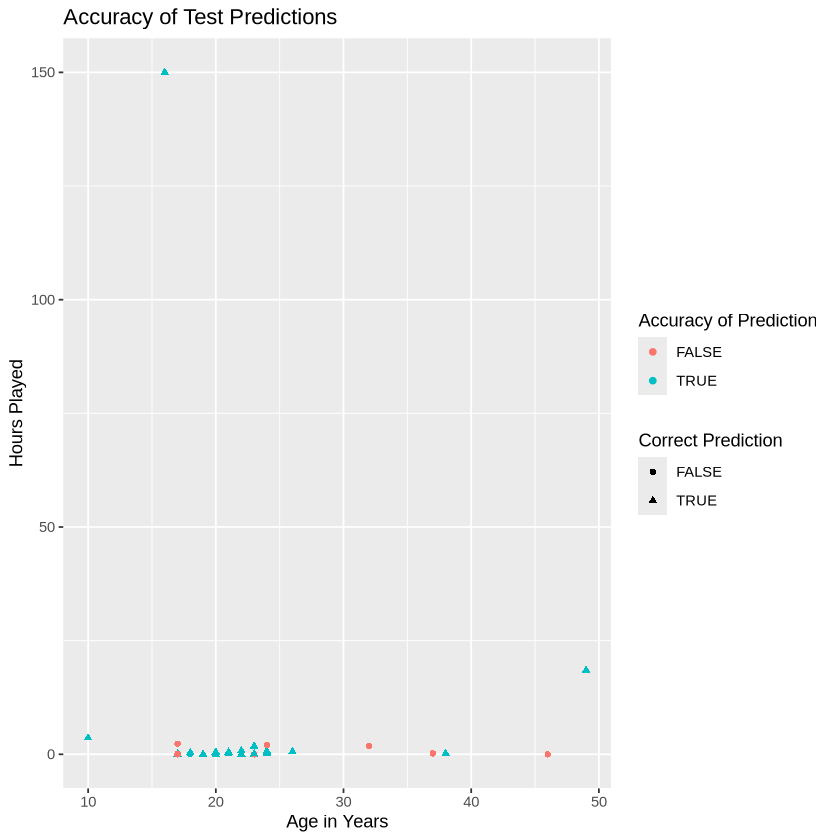

In [32]:
subscribe_test_predictions <- predict(knn_fit, player_test) |>
  bind_cols(player_test)|>
  mutate(accuracy = .pred_class == subscribe)

test_visualization <- ggplot(subscribe_test_predictions,aes(x = Age, y = played_hours, color = accuracy, shape = subscribe)) +
  geom_point() +
  labs(title = "Accuracy of Test Predictions", x = "Age in Years", y = "Hours Played", color = "Accuracy of Prediction", shape = "Correct Prediction") 
test_visualization

### Discussion

Different from what we expected it is not clear if there is a relationship between age and hours played. By splitting our data set, a model was able to be created that could predict the subscription status with a 77.55% accuracy using the K-nearest neighbours method. The K value that was found to be the best for our data was 21. Comparing to the initial run using K=3, K=21 has significantly higher accurcy rate. That being said, it does appear that the addition or removal of a variable might help in the prediction, as the current model tends to result in type 1 errors only. This is to say, there are many false positives found in the test predictions. This could indicate that the K needs to be lower, but a lower value also found a lower accuracy. It is possible thath due to there being a higher amount of subscriptions than not, having a high K value results on almost all cases predicting players are subscribed. The high accuracy could be due to the fact there is a high percentage of subscribed players compared to not, with the proportion being close to 75%.  

These results are slightly different from what we expected, simply because we thought there would be a more clear relationship between the age of players and the hours played with the subscription status. As previously mentioned, there is possibly a relationship but it might be missing a variable that we did not consider that would clairfy potential relationships. Possible variable coulg be gender, expereince, or potentially something not recorded in the original data set.

Haivng soley type 1 errors is outside of our expectations and leads us to examine where the false reports are coming from. It appears that many of them are in the higher age ranges and at low hours played. Taking this into consideration, the lack of data on the hgiher ages could be partly rsponsible for some of the fale positives, as there are not enough data sets to accurately use K-nearest neighbour at the K values we found as the most accurate. While there are many cases of players having 0 hours played, there might be a different variable such as experience or gender, that play a part in the subscription  status at the low hours played. Testing further after seperating the data based on some of the characterisitics could lead to better or different relatioships being found.

While it is not perfect, the model is still quite accurate. Knowing that there is a farily accurate predictive model for subscription status could help marketers looking at who their demographic should be. By filtering through a bunch of player data, predictions on the subscription status could then be made and advertisments can be prioritized for those who are predicted to subscribe. This can improve how funds for marketing are spent to ensure it is being applied as effectively as possible. It can also be used to learn more about the demographic subscribing to cater content to match those subscribed. Once initial subscription is understood, unsubscription rates can be looked into next which can improve longevity of subsctiption and interaction with content.

While this provides a good base to learn about who is interested in subscriptions, more questions do come up such as:
- Is there a way to limit the type 1 errors in the model?
- What other variables would increase the accuracy of subscriptions status?
- Do different demographics have different relationships with subscription?
- Is there a way to improve subscription amongst the demographics not as likely to subscribe?
- What is the unsubscription rate, and how does it relate to the the players age and hours played?
  
These questions would give further indight into understanding when, why, and who subscribe allowing for the content to be further catered to those interested to better reach and engage fans.